## Challenge 1

In [1]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter

In [2]:
! curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.2M    0 24.2M    0     0  2067k      0 --:--:--  0:00:12 --:--:-- 2267k


In [3]:
with open('turnstile_160402.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [4]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [5]:
len(rows)

194154

In [6]:
type(rows)

list

In [7]:
raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append((row[4:]))

In [8]:
benson_challenge_1 = raw_readings

benson_challenge_1 is the dictionary for challenge 1

In [18]:
#python 3 cannot index using .items, must loop through to print a few lines of dictionary
from pprint import pprint 
i = 0
for item in benson_challenge_1.items():
    pprint(item)
    i+=1
    if i >= 5:
        break

(('R413', 'R325', '00-00-01', 'WHITLOCK AV'),
 [['6', 'IRT', '03/26/2016', '00:00:00', 'REGULAR', '0000525590', '0000496724'],
  ['6', 'IRT', '03/26/2016', '04:00:00', 'REGULAR', '0000525598', '0000496742'],
  ['6', 'IRT', '03/26/2016', '08:00:00', 'REGULAR', '0000525621', '0000496754'],
  ['6', 'IRT', '03/26/2016', '12:00:00', 'REGULAR', '0000525666', '0000496772'],
  ['6', 'IRT', '03/26/2016', '16:00:00', 'REGULAR', '0000525727', '0000496795'],
  ['6', 'IRT', '03/26/2016', '20:00:00', 'REGULAR', '0000525767', '0000496848'],
  ['6', 'IRT', '03/27/2016', '00:00:00', 'REGULAR', '0000525797', '0000496876'],
  ['6', 'IRT', '03/27/2016', '04:00:00', 'REGULAR', '0000525803', '0000496898'],
  ['6', 'IRT', '03/27/2016', '08:00:00', 'REGULAR', '0000525819', '0000496905'],
  ['6', 'IRT', '03/27/2016', '12:00:00', 'REGULAR', '0000525857', '0000496921'],
  ['6', 'IRT', '03/27/2016', '16:00:00', 'REGULAR', '0000525906', '0000496960'],
  ['6', 'IRT', '03/27/2016', '20:00:00', 'REGULAR', '0000525939

## Challenge 2

In [11]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}

Need to use for loop below to examine 3 elements of dictionary, .items index does not work in Python 3

In [13]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

In [14]:
all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()

In [15]:
all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
#print (counter(all_times).most_common(10))

In [16]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}

In [19]:
benson_challenge_2 = datetime_counts

In [20]:
i = 0
from pprint import pprint 
for item in benson_challenge_2.items():
    pprint (item)
    i+=1
    if i > 2:
        break

(('R413', 'R325', '00-00-01', 'WHITLOCK AV'),
 [(datetime.datetime(2016, 3, 26, 0, 0), 8),
  (datetime.datetime(2016, 3, 26, 4, 0), 23),
  (datetime.datetime(2016, 3, 26, 8, 0), 45),
  (datetime.datetime(2016, 3, 26, 12, 0), 61),
  (datetime.datetime(2016, 3, 26, 16, 0), 40),
  (datetime.datetime(2016, 3, 26, 20, 0), 30),
  (datetime.datetime(2016, 3, 27, 0, 0), 6),
  (datetime.datetime(2016, 3, 27, 4, 0), 16),
  (datetime.datetime(2016, 3, 27, 8, 0), 38),
  (datetime.datetime(2016, 3, 27, 12, 0), 49),
  (datetime.datetime(2016, 3, 27, 16, 0), 33),
  (datetime.datetime(2016, 3, 27, 20, 0), 22),
  (datetime.datetime(2016, 3, 28, 0, 0), 7),
  (datetime.datetime(2016, 3, 28, 4, 0), 73),
  (datetime.datetime(2016, 3, 28, 8, 0), 84),
  (datetime.datetime(2016, 3, 28, 12, 0), 70),
  (datetime.datetime(2016, 3, 28, 16, 0), 62),
  (datetime.datetime(2016, 3, 28, 20, 0), 14),
  (datetime.datetime(2016, 3, 29, 0, 0), 6),
  (datetime.datetime(2016, 3, 29, 4, 0), 81),
  (datetime.datetime(2016, 3,

benson_challenge_2 is the dictionary for challenge 2

## Challenge 3

In [21]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

In [24]:
benson_challenge_3 = day_counts

In [25]:
i = 0
from pprint import pprint 
for item in benson_challenge_3.items():
    pprint (item)
    i+=1
    if i > 2:
        break

(('R413', 'R325', '00-00-01', 'WHITLOCK AV'),
 [(datetime.date(2016, 3, 26), 207),
  (datetime.date(2016, 3, 27), 164),
  (datetime.date(2016, 3, 28), 310),
  (datetime.date(2016, 3, 29), 331),
  (datetime.date(2016, 3, 30), 320),
  (datetime.date(2016, 3, 31), 347),
  (datetime.date(2016, 4, 1), 333)])
(('D010', 'R394', '00-00-03', 'BAY PKWY'),
 [(datetime.date(2016, 3, 26), 1999),
  (datetime.date(2016, 3, 27), 1627),
  (datetime.date(2016, 3, 28), 2727),
  (datetime.date(2016, 3, 29), 3404),
  (datetime.date(2016, 3, 30), 3358),
  (datetime.date(2016, 3, 31), 3217),
  (datetime.date(2016, 4, 1), 3071)])
(('N600', 'R302', '00-06-01', '57 ST'),
 [(datetime.date(2016, 3, 26), 1621),
  (datetime.date(2016, 3, 27), 1335),
  (datetime.date(2016, 3, 28), 2284),
  (datetime.date(2016, 3, 29), 2642),
  (datetime.date(2016, 3, 30), 2704),
  (datetime.date(2016, 3, 31), 2721),
  (datetime.date(2016, 4, 1), 2421)])


benson_challenge_3 is the dictionary for challenge 3

## Challenge 4

In [26]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
data = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt')

In [29]:
data.columns = data.columns.str.replace(' ','')

data["DATETIME"] = data["DATE"] + ' ' + data["TIME"]

data['DATETIME'] = pd.to_datetime(data.DATETIME, format='%m/%d/%Y %H:%M:%S')

data['dENTRIES'] = data.groupby(['C/A','UNIT','SCP','STATION']).ENTRIES.diff()

data_filtered = data[(data.dENTRIES > 0) & (data.dENTRIES <=5000)]

In [30]:
datagroupedbydate = data_filtered.groupby(['C/A','UNIT','SCP','STATION','DATE']).sum()

In [31]:
data_grouped_date = datagroupedbydate.reset_index()

In [32]:
data_grouped_date['DATETIME'] = pd.to_datetime(data_grouped_date.DATE, format='%m/%d/%Y')

In [33]:
turnstile1 = data_grouped_date[(data_grouped_date['C/A'] == 'A002') & (data_grouped_date.UNIT =='R051') & (data_grouped_date.SCP=='02-00-00') & (data_grouped_date.STATION=='59 ST')] 


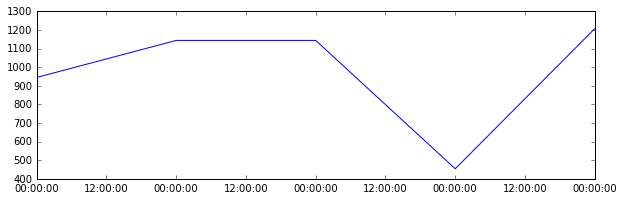

In [34]:
plt.figure(figsize=(10,3))
plt.plot(turnstile1.DATETIME,turnstile1.dENTRIES)

Plot above is submission for challenge 4

## Challenge 5

In [35]:
datagrouped5 = data_filtered.groupby(['C/A','UNIT','STATION','DATE']).sum()

In [36]:
datagrouped5.head()

ENTRIES      EXITS  dENTRIES
C/A  UNIT STATION DATE                                      
A002 R051 59 ST   03/26/2016   70531056   27440197      1664
                  03/27/2016  134017714   39315345      1740
                  03/28/2016  222571549  125971699     12991
                  03/29/2016  325430960  184333876     16493
                  03/30/2016  325531691  184399330     16662

datagrouped5 is my submission for challenge 5

## Challenge 6

In [38]:
datagrouped6 = data_filtered.groupby(['STATION','DATE']).sum()

In [39]:
datagrouped6.head()

ENTRIES        EXITS  dENTRIES
STATION DATE                                         
1 AV    03/26/2016  7800403180  17376385914     14546
        03/27/2016  9360582797  20851729162     15446
        03/28/2016  9360681182  20851799152     22046
        03/29/2016  9360821714  20851885465     24190
        03/30/2016  9360969635  20851976717     24818

datagrouped6 is my submission for challenge 6

## Challenge 7

In [40]:
data_grouped6 = datagrouped6.reset_index()

In [41]:
data_grouped6['DATETIME'] = pd.to_datetime(data_grouped6.DATE, format='%m/%d/%Y')

In [42]:
station7 = data_grouped6[(data_grouped6['STATION'] == '1 AV')]

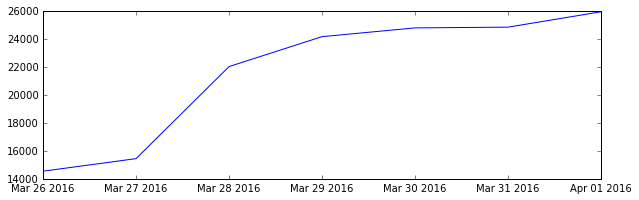

In [43]:
plt.figure(figsize=(10,3))
plt.plot(station7.DATETIME,station7.dENTRIES)

plot above is my submission for challenge 7

## Challenge 8

In [44]:
data2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160326.txt')

data3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160319.txt')

data4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160312.txt')

In [45]:
data2.columns = data2.columns.str.replace(' ','')

data2["DATETIME"] = data2["DATE"] + ' ' + data2["TIME"]

data2['DATETIME'] = pd.to_datetime(data2.DATETIME, format='%m/%d/%Y %H:%M:%S')

data2['dENTRIES'] = data2.groupby(['C/A','UNIT','SCP','STATION']).ENTRIES.diff()

data_filtered2 = data2[(data2.dENTRIES > 0) & (data2.dENTRIES <=5000)]

In [46]:
data3.columns = data3.columns.str.replace(' ','')

data3["DATETIME"] = data3["DATE"] + ' ' + data3["TIME"]

data3['DATETIME'] = pd.to_datetime(data3.DATETIME, format='%m/%d/%Y %H:%M:%S')

data3['dENTRIES'] = data3.groupby(['C/A','UNIT','SCP','STATION']).ENTRIES.diff()

data_filtered3 = data3[(data3.dENTRIES > 0) & (data3.dENTRIES <=5000)]

In [47]:
data4.columns = data4.columns.str.replace(' ','')

data4["DATETIME"] = data4["DATE"] + ' ' + data4["TIME"]

data4['DATETIME'] = pd.to_datetime(data4.DATETIME, format='%m/%d/%Y %H:%M:%S')

data4['dENTRIES'] = data4.groupby(['C/A','UNIT','SCP','STATION']).ENTRIES.diff()

data_filtered4 = data4[(data4.dENTRIES > 0) & (data4.dENTRIES <=5000)]

In [48]:
datagrouped8_1 = data_filtered.groupby(['STATION','DATE']).sum()

datagrouped8_2 = data_filtered2.groupby(['STATION', 'DATE']).sum()

datagrouped8_3 = data_filtered3.groupby(['STATION', 'DATE']).sum()

datagrouped8_4 = data_filtered4.groupby(['STATION', 'DATE']).sum()

In [49]:
grouped8_1 = datagrouped8_1.reset_index()

grouped8_2 = datagrouped8_2.reset_index()

grouped8_3 = datagrouped8_3.reset_index()

grouped8_4 = datagrouped8_4.reset_index()

In [50]:
grouped8_1['DATETIME'] = pd.to_datetime(grouped8_1.DATE, format='%m/%d/%Y')

grouped8_2['DATETIME'] = pd.to_datetime(grouped8_2.DATE, format='%m/%d/%Y')

grouped8_3['DATETIME'] = pd.to_datetime(grouped8_3.DATE, format='%m/%d/%Y')

grouped8_4['DATETIME'] = pd.to_datetime(grouped8_4.DATE, format='%m/%d/%Y')

In [51]:
grouped8_1['WEEKDAY'] = grouped8_1.DATETIME.apply(lambda x: x.weekday())
grouped8_2['WEEKDAY'] = grouped8_2.DATETIME.apply(lambda x: x.weekday())
grouped8_3['WEEKDAY'] = grouped8_3.DATETIME.apply(lambda x: x.weekday())
grouped8_4['WEEKDAY'] = grouped8_4.DATETIME.apply(lambda x: x.weekday())


In [52]:
station8_1 = grouped8_1[(grouped8_1['STATION'] == '1 AV')]

station8_2 = grouped8_2[(grouped8_2['STATION'] == '1 AV')]

station8_3 = grouped8_3[(grouped8_3['STATION'] == '1 AV')]

station8_4 = grouped8_4[(grouped8_4['STATION'] == '1 AV')]

In [53]:
station8_1sort = station8_1.sort_values('WEEKDAY')
station8_2sort = station8_2.sort_values('WEEKDAY')
station8_3sort = station8_3.sort_values('WEEKDAY')
station8_4sort = station8_4.sort_values('WEEKDAY')

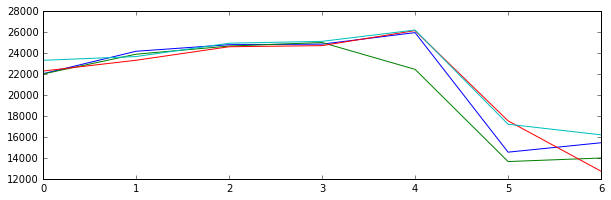

In [54]:
plt.figure(figsize=(10,3))
plt.plot(station8_1sort.WEEKDAY,station8_1sort.dENTRIES)
plt.plot(station8_2sort.WEEKDAY,station8_2sort.dENTRIES)
plt.plot(station8_3sort.WEEKDAY,station8_3sort.dENTRIES)
plt.plot(station8_4sort.WEEKDAY,station8_4sort.dENTRIES)

Plot above is my submission for 4 weeks of daily entry counts at station 1 AV, from Monday to Sunday

## Challenge 9

In [55]:
consolidated = data_filtered.append(data_filtered2)

consolidated = consolidated.append(data_filtered3)

consolidated = consolidated.append(data_filtered4)

In [56]:
consolidatedgroup = consolidated.groupby(['STATION']).sum()


<Container object of 373 artists>

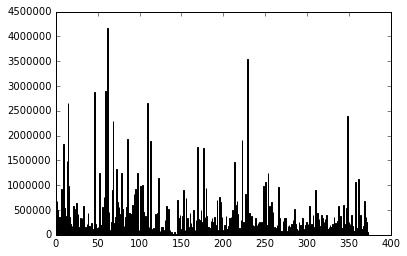

In [57]:
indices = range(len(consolidatedgroup.dENTRIES))
plt.bar(indices, consolidatedgroup.dENTRIES)

In [58]:
consolidatedsorted = consolidatedgroup.sort_values('dENTRIES', ascending=False)

In [59]:
consolidatedsorted.head()

,ENTRIES,EXITS,dENTRIES
STATION,,,
34 ST-PENN STA,682630441271,335265737836,4171093
GRD CNTRL-42 ST,431881784520,113008200413,3540148
34 ST-HERALD SQ,268590737041,218622507255,2898478
23 ST,598347484783,513527388629,2873687
14 ST-UNION SQ,230695539559,81342499161,2665267


consolidatedsorted is a list of sorted entry counts combined for each station over a month

## Challenge 10

In [62]:
consolidatedsorted.shape

(373, 3)

(array([ 124.,   99.,   60.,   26.,   22.,    5.,    7.,    7.,    5.,
           1.,    2.,    0.,    3.,    4.,    0.,    0.,    1.,    1.,
           0.,    2.,    2.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    1.]),
 array([    6109. ,   144941.8,   283774.6,   422607.4,   561440.2,
          700273. ,   839105.8,   977938.6,  1116771.4,  1255604.2,
         1394437. ,  1533269.8,  1672102.6,  1810935.4,  1949768.2,
         2088601. ,  2227433.8,  2366266.6,  2505099.4,  2643932.2,
         2782765. ,  2921597.8,  3060430.6,  3199263.4,  3338096.2,
         3476929. ,  3615761.8,  3754594.6,  3893427.4,  4032260.2,
         4171093. ]),
 <a list of 30 Patch objects>)

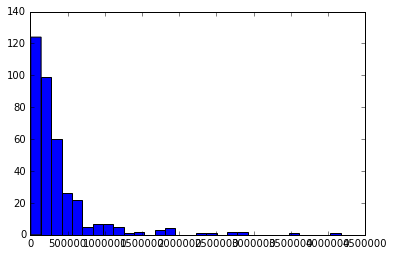

In [63]:
plt.hist(consolidatedsorted.dENTRIES, bins = 30)

Above is the histogram for challenge 10